@Author: Rahul<br>
@Date: 18-11-2024<br>
@Last modified by: Rahul<br>
@Last modified Date:18-11-2024<br>
@Title: predicting whether user will earn more than 50k using single layer neural network

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [39]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 
    'marital_status', 'occupation', 'relationship', 'race', 'sex', 
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

# Read the CSV file without headers and assign column names
dataset = pd.read_csv('Salary_Prediction_Model.csv', header=None, names=column_names,na_values=[' ?'])

print(dataset.info())

categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for column in categorical_columns:
    mode_value = dataset[column].mode()[0]
    dataset[column].fillna(mode_value, inplace=True)

dataset.info()
print(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns

C:\Users\rahul\AppData\Local\Temp\ipykernel_30172\1645067652.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(mode_value, inplace=True)


Encoding the Categorical Data

In [40]:
salary_predict = dataset[['workclass','education','marital_status']]
salary_predict

label_encoder = LabelEncoder()

for column in salary_predict.columns:
    salary_predict[column] = label_encoder.fit_transform(salary_predict[column])

# Display the encoded DataFrame
print(salary_predict)

dataset['income'] = label_encoder.fit_transform(dataset['income'])
dataset['income'].head(10)

       workclass  education  marital_status
0              6          9               4
1              5          9               2
2              3         11               0
3              3          1               2
4              3          9               2
...          ...        ...             ...
32556          3          7               2
32557          3         11               2
32558          3         11               6
32559          3         11               4
32560          4         11               2

[32561 rows x 3 columns]


C:\Users\rahul\AppData\Local\Temp\ipykernel_30172\1075386981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_predict[column] = label_encoder.fit_transform(salary_predict[column])
C:\Users\rahul\AppData\Local\Temp\ipykernel_30172\1075386981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_predict[column] = label_encoder.fit_transform(salary_predict[column])
C:\Users\rahul\AppData\Local\Temp\ipykernel_30172\1075386981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

Spliting the data

In [41]:
feature = salary_predict
target = dataset['income']

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

In [ ]:
# Scale the features


model = Sequential()

# Input layer (input shape should match the number of features)
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layer(s)
model.add(Dense(32, activation='relu'))

# Output layer (single neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()

c:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [44]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

ValueError: You must call `compile()` before using the model.

Evaluate the model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8292 - loss: 0.3891
Test accuracy: 81.71%


In [ ]:
predictions = model.predict(X_test)

# Convert probabilities to binary output (0 or 1)
predictions = (predictions > 0.5).astype(int)

# Print the first 10 predictions
print(predictions[:10])

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


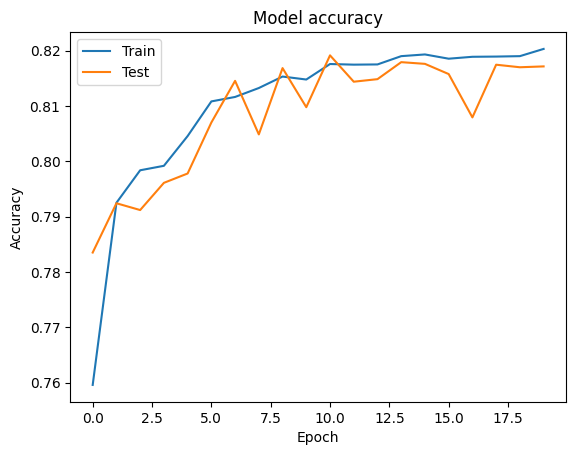

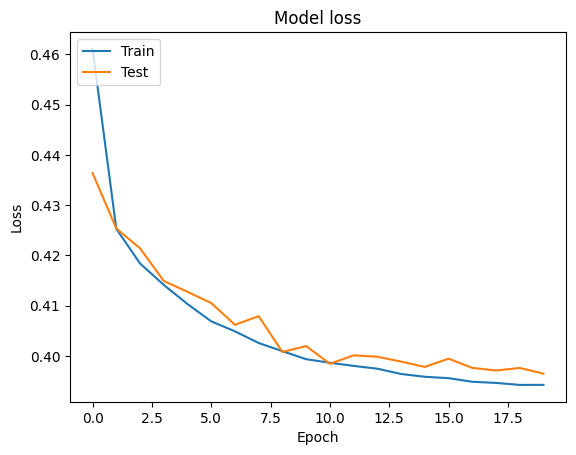

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
